Ryan Malmfelt

ITCS 3162

10/9/2024

Project 2

Australian Weather

INTRODUCTION:

The continent of Australia is known for some of its cool features. The Great Barrier Reef which houses some of the world's most special marine biodiversity, the Sydney Opera House, one of the world's most incredible places for performing arts and culture. Also they have the Outback, which is a remote and sparsely populated area, but consists of some of the most dangerous creatures in the world. This project will focus on the weather in Australia. According to an article written about what the weather is like in Australia, Australia’s climate varies greatly throughout the eight states and territories; there are four seasons across the country and a wet and dry season in the tropical north. It also states that Australia’s seasons are at opposite times to those in the northern hemisphere. This means that the months of December to February are summer, the months of March to May are autumn, June to August is winter, and September to November is spring. The overall object that I plan to focus on for this project is to create different classification models that can predict rainy weather in Australia.

INTRODUCING THE DATASET:

The dataset that I chose to focus on is from Kaggle titled Rain in Australia. Looking at the dataset description it has 145,460 rows of data and 23 columns of different features. It contains data starting December 1st, 2008 and ending June 25th, 2017. There are many features that would be interesting to look at in order to predict rainy weather. Location is key to look at because Australia has its tropical spots and then they have really dry areas. The dataset consists of other features such as minimum and maximum temperature, humidity, wind, and pressure that can tell a lot about the weather. The features that will help create classification models are RainToday and RainTomorrow. Overall with this dataset, I am going to attempt to predict next day rain using these other weather pattern characteristics.

Link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


DATA PREPROCESSING:

I began my data preprocessing by making sure the usability of the dataset I chose was high. I wanted to check the usability of the dataset because if the usability of the dataset is low, then how are you gonna know if you're going to get good and accurate results?   The usability of the dataset I pulled from Kaggle was 10/10; so the dataset is very well functional and good to use for the predictions that I intend to answer. Next I wanted to make sure that I was able to pull the CSV file and copy it into my notebook in order to have all the features that the file included. This step is needed to make sure you have the correct data in order to answer your questions. Another step that I chose to take was to look for null values in the dataset. It is important to check for null values because having null values means that you have unknown values in your dataset and could mix up your potential results. After checking the dataset, There are a lot of null values in most of the columns. I then did all the main preprocessing steps. I made sure to check the shape, columns, and data types of the features.




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aus_data = pd.read_csv(r'C:\Users\malmf\AppData\Local\Temp\8ad887b1-52a3-49f4-8ae5-d2a6d094d3b2_archive (4).zip.3b2\weatherAUS.csv')
aus_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
aus_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
aus_data.shape

(145460, 23)

In [7]:
aus_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
aus_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

DATA VISUALIZATION

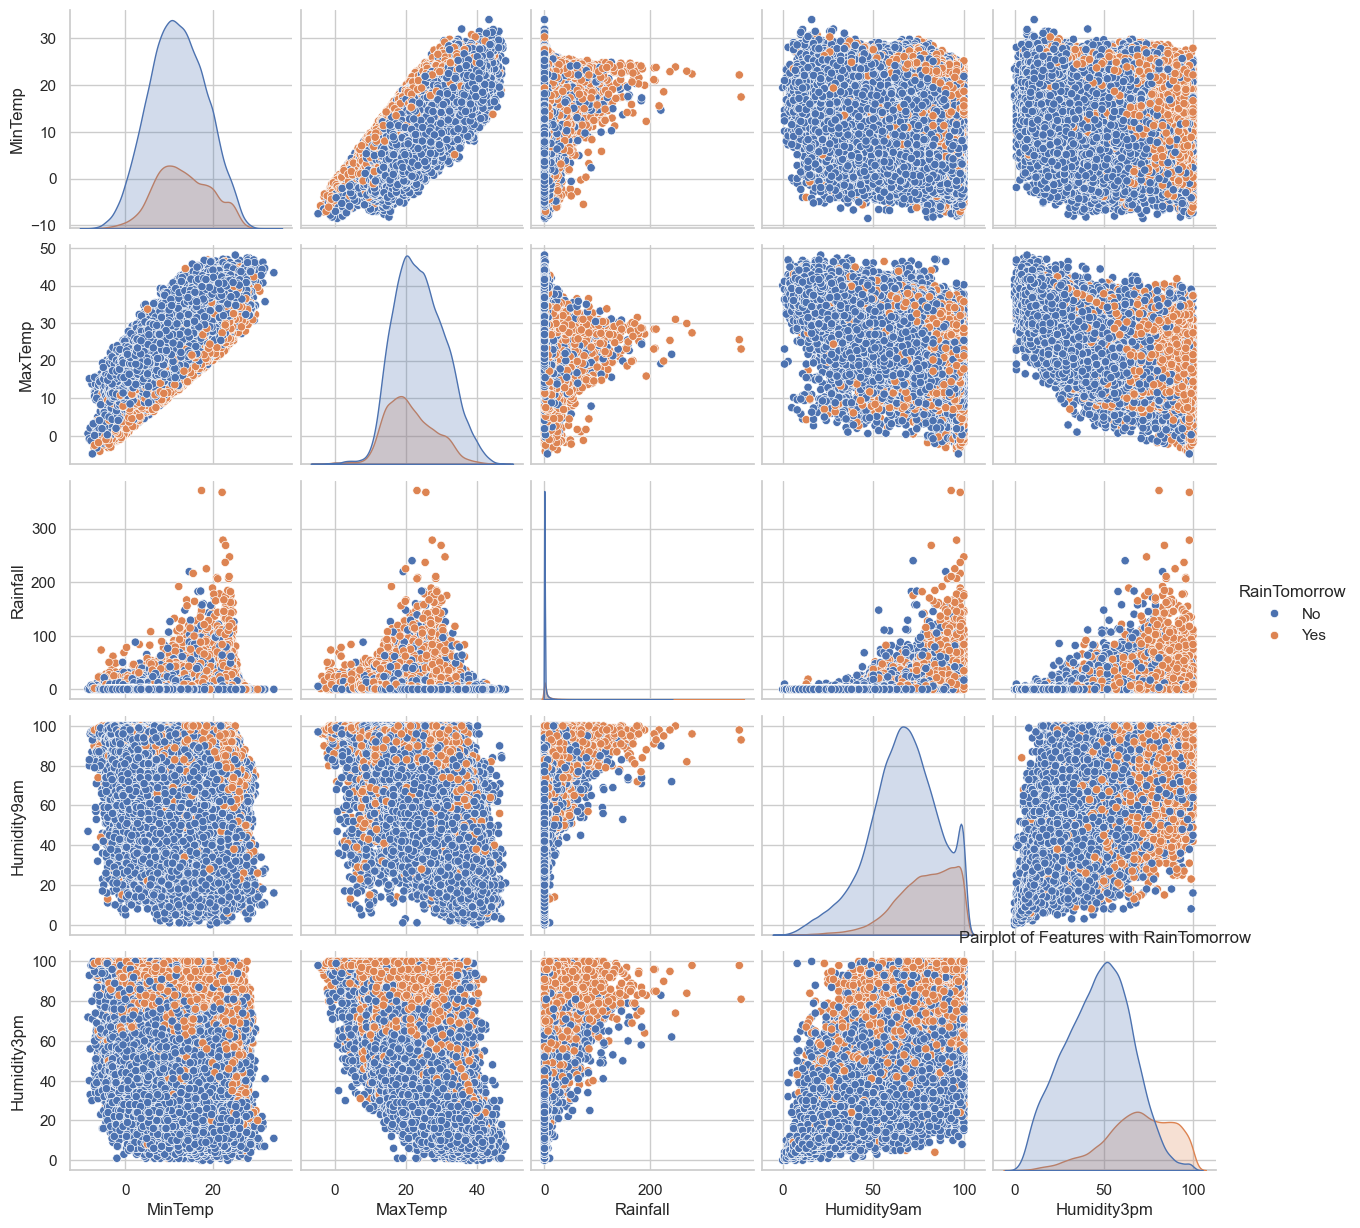

In [9]:
# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# 1. Pairplot to visualize relationships between features and RainTomorrow
sns.pairplot(aus_data, hue='RainTomorrow', vars=['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm'])
plt.title('Pairplot of Features with RainTomorrow')
plt.show()

The first visualization that I wanted to look at is a pairplot that shows the correlation between different features such as minimum and maximum temperature, rainfall, and humidity level and 9am and 3pm the dots represent if it will rain tomorrow. We can see that if the humidity is higher it likely will rain the next day. also we tend to see more rainfall the higher the humidity is, especially around the 3pm time. This also goes along with the temperature. Using prevoius knowledge, high humidity tends to lead to higher maximum temperature, thus leading to more possible rain the next day. This pairplot also supports this statement.

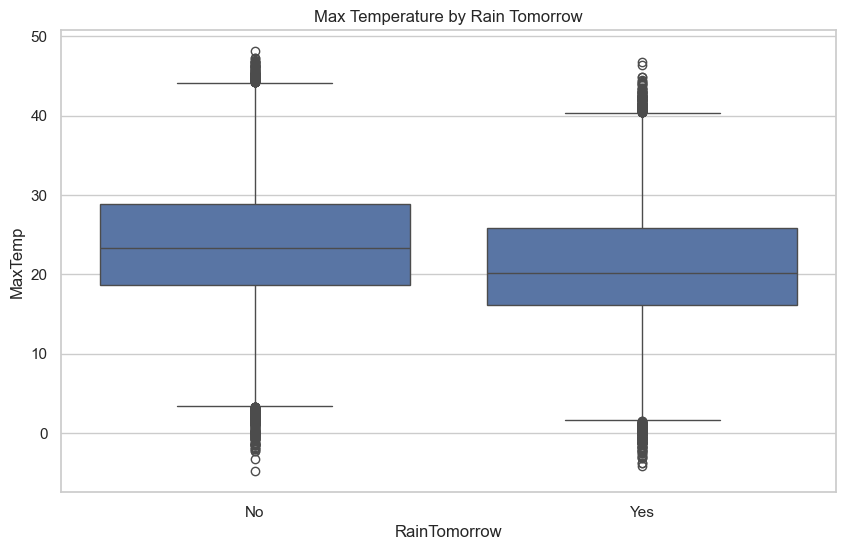

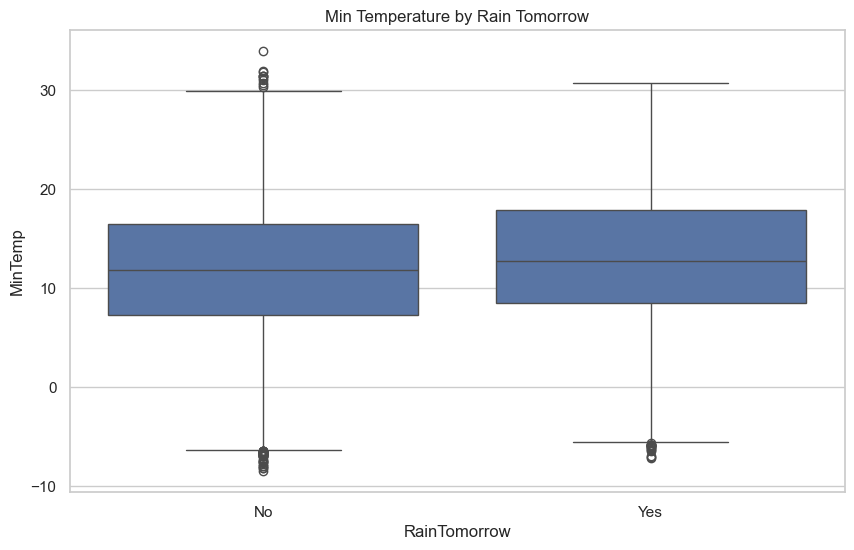

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=aus_data)
plt.title('Max Temperature by Rain Tomorrow')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='MinTemp', data=aus_data)
plt.title('Min Temperature by Rain Tomorrow')
plt.show()

The next thing I wnated to look at is a box plot that shows minimum and maximum tmeperature and when it might rain the next day. Looking at maximum temperature first. Keep in mind that the temperature is not measured in fahrenheit but it is measured in celsius. If we look at the plot we see that when the maxium temperature is higher at around 40 to 50 degrees celsius that it is more likely to rain the next day, but when the maxium temperature is lower at around 0 to negative degrees celsius it is not likely to rain the next day. Then looking at minimum temperature. The lower the temperature the more likely it wasn't going to rain the next day.

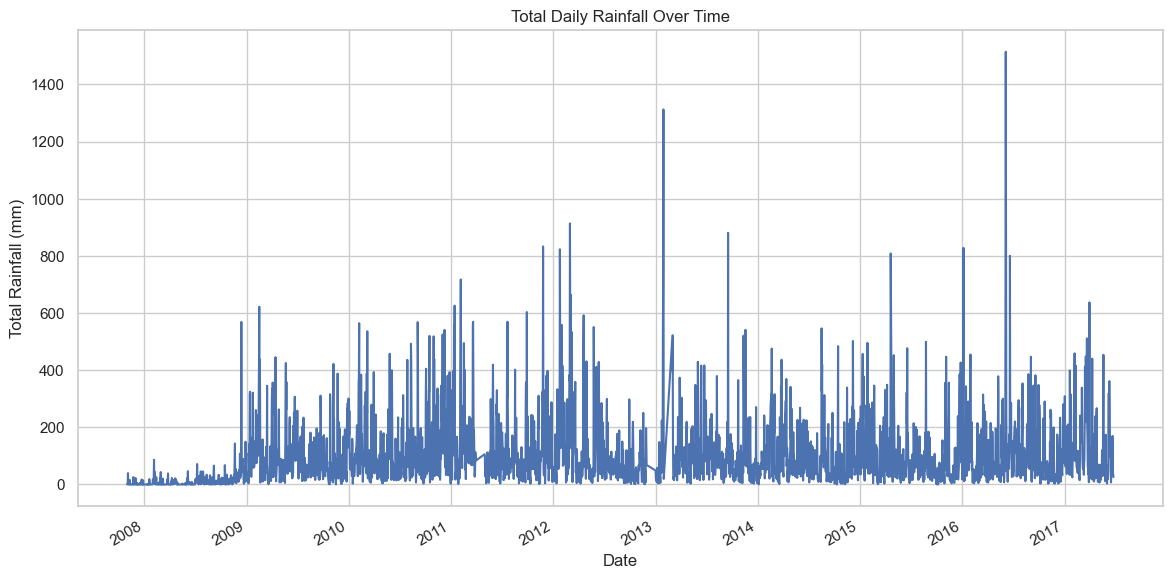

In [18]:
aus_data['Date'] = pd.to_datetime(aus_data['Date'])
plt.figure(figsize=(14, 7))
aus_data.groupby('Date')['Rainfall'].sum().plot()
plt.title('Total Daily Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rainfall (mm)')
plt.show()

This visualization shows the total rainfall through the years from 2008 to 2017. As we look at the plot we see that in 2008 there was hardly any total rainfall. It did not reach close to 200mm. We start to see a steady incline after the year 2009. Total rainfall stays steady for a while but then jumps again starting in the year 2013. After 2013 we actually see a decline until around 2016. Around halfway through 2016 we see the largest total rainfall at over 1400mm. I think that it is pretty shocking to see that in just 8-9 years we saw a rise of almost 1200mm in total rainfall throughout the country of Australia. With previous knowledge this could be caused due to stuff like climate change and different kinds of pollution caused by people.

In [22]:
# Check current columns
print("Current columns in the DataFrame:", aus_data.columns)

# Proceed only if 'Date' column exists
if 'Date' in aus_data.columns:
    # Convert 'Date' column to datetime
    aus_data['Date'] = pd.to_datetime(aus_data['Date'])
    
    # Extract year, month, and day as new features
    aus_data['Year'] = aus_data['Date'].dt.year
    aus_data['Month'] = aus_data['Date'].dt.month
    aus_data['Day'] = aus_data['Date'].dt.day
    
    # Drop the original Date column
    aus_data = aus_data.drop(columns=['Date'])
else:
    print("Date column not found in the DataFrame. Available columns:", aus_data.columns)

# Label encode binary columns
label_encoder = LabelEncoder()
aus_data['RainToday'] = label_encoder.fit_transform(aus_data['RainToday'])
aus_data['RainTomorrow'] = label_encoder.fit_transform(aus_data['RainTomorrow'])

# One-hot encode categorical wind direction columns
aus_data = pd.get_dummies(aus_data, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'], drop_first=True)

# Impute missing values
num_cols = aus_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
aus_data[num_cols] = imputer.fit_transform(aus_data[num_cols])

# Scale numerical features
scaler = StandardScaler()
aus_data[num_cols] = scaler.fit_transform(aus_data[num_cols])

# Splitting data into train and test
X = aus_data.drop('RainTomorrow', axis=1)
y = aus_data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Current columns in the DataFrame: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [23]:
# Assuming aus_data is already preprocessed
X = aus_data.drop('RainTomorrow', axis=1)  
y = aus_data['RainTomorrow']  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8441037627755625
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     32989
           1       0.77      0.50      0.60      9651
           2       0.80      0.40      0.53       998

    accuracy                           0.84     43638
   macro avg       0.81      0.62      0.68     43638
weighted avg       0.84      0.84      0.83     43638

Confusion Matrix:
 [[31661  1289    39]
 [ 4814  4778    59]
 [  463   139   396]]


I first looked at a Random Forest Classification model. A Random Forest Classification model works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.Using Random Forest for classification offers several advantages. The algorithm's ability to handle high-dimensional data, robustness to noise, and reduced risk of overfitting make it well-suited for classification tasks. It performs well across various domains, including image recognition, text classification, and medical diagnosis. Despite its advantages, Random Forest has limitations in classification tasks. The algorithm's computational cost, especially for large datasets, can be prohibitive. Additionally, Random Forest may struggle with imbalanced datasets, requiring additional techniques to ensure balanced and accurate predictions. The complexity of tuning hyperparameters, such as the number of trees and maximum depth, can also be a challenge. 

Now moving on to Evaluation:

IN my model, I made sure to include NO Rain as variable 0, and RainTomorrow as variable 1. Variable 2 is just another variable that can be used to further my evaluation, but I plan on just looking at No Rain and RainTomorrow.

Accuracy = 0.8441 or 84.41%, which is the proportion of correctly predicted instances (of all classes) out of the total predictions made. This indicates that the model is correct 84.41% of the time.

Precision: This measures how many of the predicted instances for a class are actually correct.

For class 0, precision is 0.86 (86%). This means 86% of the time when the model predicts class 0, it is correct.
For class 1, precision is 0.77 (77%).

Recall: This is the proportion of actual instances of a class that the model correctly identifies.

For class 0, recall is 0.96 (96%), meaning 96% of the actual class 0 instances were correctly identified by the model.
For class 1, recall is 0.50 (50%).

F1-Score: This is the harmonic mean of precision and recall, balancing the two. It's a good measure of performance when there's an uneven class distribution.

F1-score for class 0 is 0.91 (91%).
For class 1, F1-score is 0.60 (60%).

Support: This shows the number of actual instances for each class.

Class 0 has 32,989 instances.
Class 1 has 9,651 instances.

Overall The accuracy is very high at 84.41%, so this was a good model to look at.

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.3765296301388698
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.37      0.52     32989
           1       0.37      0.35      0.36      9651
           2       0.04      0.91      0.08       998

    accuracy                           0.38     43638
   macro avg       0.44      0.54      0.32     43638
weighted avg       0.75      0.38      0.48     43638

Confusion Matrix:
 [[12127  5632 15230]
 [ 1488  3395  4768]
 [   58    31   909]]


The next model I wanted to look at was a Naive Bayes Accuracy Classification model.  Naive Bayes classifiers, a family of algorithms based on Bayes’ Theorem. Despite the “naive” assumption of feature independence, these classifiers are widely utilized for their simplicity and efficiency in machine learning. Naïve Bayes algorithm is used for classification problems. It is highly used in text classification. In text classification tasks, data contains high dimension (as each word represent one feature in the data). It is used in spam filtering, sentiment detection, rating classification etc. The advantage of using naïve Bayes is its speed. It is fast and making prediction is easy with high dimension of data. If your test data set has a categorical variable of a category that wasn’t present in the training data set, the Naive Bayes model will assign it zero probability and won’t be able to make any predictions in this regard. This phenomenon is called ‘Zero Frequency,’ and you’ll have to use a smoothing technique to solve this problem.

Evaluation:

Accuracy:

Accuracy = 0.3765 (or 37.65%), meaning the model correctly predicts the target only 37.65% of the time. This is quite low compared to the Random Forest accuracy, suggesting that Naive Bayes might not be the best fit for this dataset.

Precision: The percentage of predicted instances of a class that are actually correct.

Class 0 (No Rain): Precision is 0.89, meaning 89% of predictions for "No Rain" were correct.
Class 1 (Rain Tomorrow): Precision is 0.37, meaning only 37% of predictions for "Rain Tomorrow" were correct.

Recall: The proportion of actual instances of a class that were predicted correctly.

Class 0: Recall is 0.37, meaning only 37% of the "No Rain" instances were correctly predicted.
Class 1: Recall is 0.35, meaning 35% of the "Rain Tomorrow" instances were correctly identified.

F1-Score: This balances precision and recall. 

the F1-score for it is very low (0.08). Class 0's F1-score is 0.52, meaning performance is mediocre for predicting "No Rain," and for class 1 (Rain Tomorrow), it’s 0.36.

Support: This is the number of true instances for each class in the test set.

Class 0: 32,989 instances.
Class 1: 9,651 instances.
Class 2: 998 instances.

The Naive Bayes model performs poorly in predicting "Rain Tomorrow" (class 1).

Given these results, Random Forest is likely a much better choice for this classification task. Naive Bayes might not be suited to the relationships in your data, especially if they involve non-linear patterns or interactions between features.

In [12]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8223108300105413
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     32989
           1       0.70      0.47      0.56      9651
           2       0.73      0.26      0.39       998

    accuracy                           0.82     43638
   macro avg       0.76      0.56      0.61     43638
weighted avg       0.81      0.82      0.81     43638

Confusion Matrix:
 [[31088  1834    67]
 [ 5087  4532    32]
 [  594   140   264]]


The last Classification model I wated to look at is a KKN (K-Nearest Neighbors) Accuracy model. It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute. KNN algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. K-NN is less sensitive to outliers compared to other algorithms. KNN is known for its simplicity, comprehensibility, and scalability. Learning and implementation are extremely simple and intuitive. It is easy to interpret. The mathematical computations are easy to comprehend and understand.The calculation time is less.
Predictive power is very high, which makes it effective and efficient.KNN is very effective for large training sets. Can be expensive in determining K if the dataset is large. It requires more memory storage than an effective classifier or supervised learning algorithms.
In KNN, the prediction phase is slow for a larger dataset. The computation of accurate distances plays a big role in determining the algorithm’s accuracy.One of the major steps in KNN is determining the parameter K. Sometimes, it is unclear which type of distance to use and which feature will give the best result.

Evaluation:

Accuracy:

Accuracy = 0.8223 (or 82.23%), meaning the model correctly predicts the target class 82.23% of the time. This is a decent performance, but it is slightly lower than the Random Forest's accuracy.

Precision: This indicates how many of the predicted instances for each class are actually correct.

Class 0 (No Rain): Precision is 0.85, meaning 85% of predictions for class 0 were correct.
Class 1 (Rain Tomorrow): Precision is 0.70, meaning 70% of predictions for class 1 were correct.

Recall: This is the proportion of actual instances that were correctly predicted for each class.

Class 0: Recall is 0.94, meaning 94% of actual class 0 instances were predicted correctly.
Class 1: Recall is 0.47, meaning only 47% of actual class 1 instances were identified correctly.

F1-Score: This is a balance between precision and recall.

Class 0: F1-score is 0.89, meaning the model performs very well at predicting class 0.
Class 1: F1-score is 0.56, indicating moderate performance for predicting class 1.

The model performs very well for class 0 (No Rain), with high precision (85%) and recall (94%). However, it struggles with class 1 (Rain Tomorrow), particularly with recall, which is quite low for both.

Predicting RainTomorrow (class 1) was my main goal, KNN was not the best choice, as it has relatively low recall (0.47), meaning it's missing more than half of the instances where it should predict "Rain Tomorrow." I want to stick with a more accurate model like the Random Forest one above.








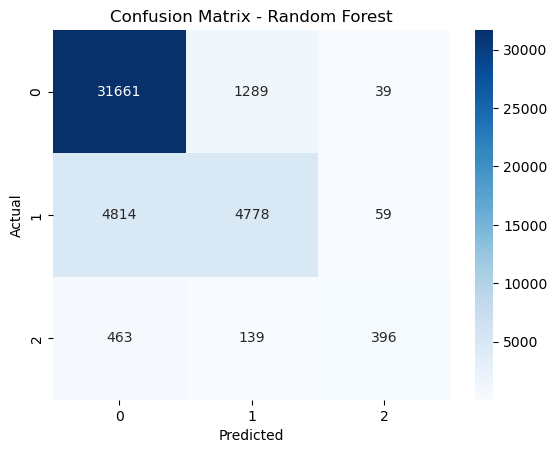

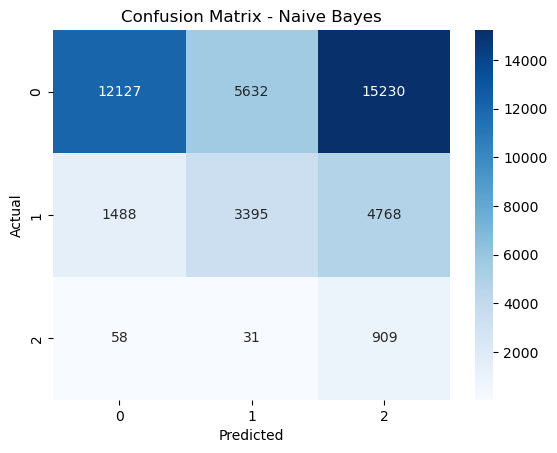

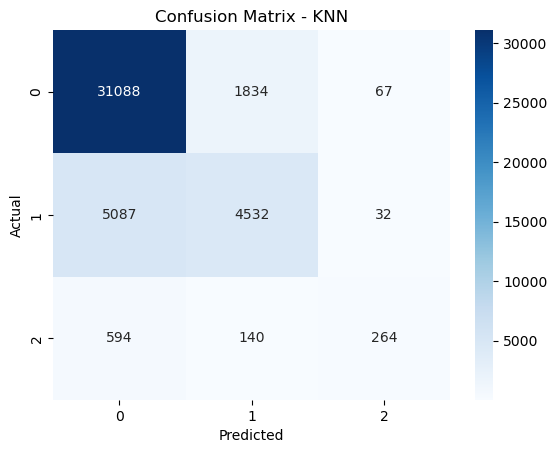

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model

plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nb), "Naive Bayes")

plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), "KNN")


This is a confusion matrix that I decide to make. This also adds class 2 which I did not include in evaluation of the models. Here is a breakdown of every model:

Random Forest:

Class 0 (No Rain):
31661 instances were correctly predicted as class 0 (True Negatives).
1289 instances were incorrectly predicted as class 1 (False Positives).
39 instances were incorrectly predicted as class 2 (False Positives).

Class 1 (Rain Tomorrow):
4814 instances were incorrectly predicted as class 0 (False Negatives).
4778 instances were correctly predicted as class 1 (True Positives).
59 instances were incorrectly predicted as class 2 (False Positives).

Class 2:
463 instances were incorrectly predicted as class 0 (False Negatives).
139 instances were incorrectly predicted as class 1 (False Negatives).
396 instances were correctly predicted as class 2 (True Positives).

Summary: Overall the model is very good at predicting class 0 (No Rain), with a large number of correct predictions (31,661) and relatively few misclassifications.For class 1 (Rain Tomorrow), the model struggles: more instances (4,814) were incorrectly predicted as class 0 than were correctly classified (4,778).Class 2 also has a high misclassification rate, with most instances being predicted as either class 0 or 1.

Naive Bayes:

Class 0 (No Rain):

12,127 instances were correctly predicted as class 0 (True Negatives).
5,632 instances were incorrectly predicted as class 1 (False Positives).
15,230 instances were incorrectly predicted as class 2 (False Positives).

Class 1 (Rain Tomorrow):
1,488 instances were incorrectly predicted as class 0 (False Negatives).
3,395 instances were correctly predicted as class 1 (True Positives).
4,768 instances were incorrectly predicted as class 2 (False Positives).

Class 2:
58 instances were incorrectly predicted as class 0 (False Negatives).
31 instances were incorrectly predicted as class 1 (False Negatives).
909 instances were correctly predicted as class 2 (True Positives).

Summary:
Class 0 (No Rain): The model correctly predicted only 12,127 out of 32,989 actual "No Rain" instances, which is quite low (explaining the 37% recall for class 0). It misclassified many instances as either class 1 (5,632) or class 2 (15,230), suggesting that the model struggles significantly with correctly identifying "No Rain" and tends to over-predict class 2.

Class 1 (Rain Tomorrow): The model correctly predicted 3,395 out of 9,651 actual "Rain Tomorrow" instances, leading to a recall of 35%. It misclassified many instances as either class 0 (1,488) or class 2 (4,768).

Class 2: This class performs better in terms of recall (91%) but at the cost of precision, as it incorrectly classifies many instances from class 0 and 1 as class 2. The 15,230 instances of class 0 predicted as class 2 highlight this issue. The model heavily over-predicts class 2, resulting in a high recall for class 2 but low precision. It struggles with classifying both "No Rain" and "Rain Tomorrow," leading to poor overall accuracy (37.65%).

KNN:

Class 0 (No Rain):

31,088 instances were correctly predicted as class 0 (True Negatives).
1,834 instances were incorrectly predicted as class 1 (False Positives).
67 instances were incorrectly predicted as class 2 (False Positives).
Class 1 (Rain Tomorrow):

5,087 instances were incorrectly predicted as class 0 (False Negatives).
4,532 instances were correctly predicted as class 1 (True Positives).
32 instances were incorrectly predicted as class 2 (False Positives).

Class 2:
594 instances were incorrectly predicted as class 0 (False Negatives).
140 instances were incorrectly predicted as class 1 (False Negatives).
264 instances were correctly predicted as class 2 (True Positives).

Summary:
Class 0 (No Rain): The model correctly predicted 31,088 out of the total actual "No Rain" instances, which is strong performance. There are relatively fewer misclassifications into class 1 (1,834) and class 2 (67), suggesting a good precision and recall for class 0.

Class 1 (Rain Tomorrow): The model correctly predicted 4,532 out of 9,619 actual instances of "Rain Tomorrow," meaning it misses about half of them (recall is around 47%). The 5,087 misclassifications into class 0 show that the model tends to underpredict class 1.

Class 2: Out of 998 instances, only 264 were correctly predicted as class 2, meaning most instances were misclassified as either class 0 or class 1, which results in low recall for class 2.

The model is performing well for class 0 (No Rain), with a large number of correct predictions.
It struggles with class 1 (Rain Tomorrow), as nearly half the instances are incorrectly classified as class 0.
Class 2 continues to be the most challenging for the model, with a majority of its instances being misclassified into other classes.




STORY TELLING:

As I ventured into the task of predicting whether it will rain tomorrow, I was driven by a fundamental question: Can I accurately forecast rain tomorrow based on historical weather data? Using a variety of classification models, I sought to answer this question by building predictive models from a rich dataset filled with weather features such as temperature, wind speed, humidity, and cloud cover.

My problem began with the objective to predict a binary outcome—whether or not it would rain tomorrow (RainTomorrow). However, the dataset contained more complexity than anticipated. There were instances in the data that could potentially be categorized as uncertain or borderline cases, and this led me to explore multiple models to handle the prediction task.

While I was able to improve predictive accuracy, answering my original question came with nuance. I can say with confidence that predicting whether it will rain tomorrow is practical with reasonable accuracy, but the reliability varies depending on the approach. Random Forest stands out as the best method for my data, but it isn’t perfect, and further fine-tuning is required for even more precise forecasting, especially when predicting rain in borderline or uncertain conditions. The story of rain prediction doesn't end here—it invites more exploration into feature engineering, handling class imbalances, and model optimization.

In conclusion, I was able to answer my initial question with valuable insights: yes, predicting rain tomorrow is possible, but achieving highly accurate and consistent results across all conditions remains a challenging task that requires the right combination of algorithms and data handling techniques.


IMPACT:

Accurate rain prediction holds the promise of directly influencing many aspects of daily life. Farmers, for instance, rely heavily on weather forecasts to make informed decisions about planting, irrigation, and harvesting. A more accurate prediction model could reduce crop loss due to unexpected weather conditions and ultimately help maintain food security.

Beyond agriculture, individuals and businesses—from outdoor event organizers to construction companies—could benefit from improved planning and scheduling. On a larger scale, better weather forecasts can reduce accidents related to weather conditions, such as car crashes during rainstorms, improving public safety.

However, social consequences could also arise if these predictions fail. Inaccurate predictions of rain could lead to inconveniences or economic loss for those who rely heavily on forecasts. If trust in prediction models is broken due to consistent errors, it might lead to a more general skepticism toward science and technology.

Predicting rain accurately has a profound environmental impact. Water conservation efforts, for example, are often tied to weather predictions. Farmers might adjust their water usage based on forecasts, reducing unnecessary irrigation during predicted rainfall periods. This could contribute to more sustainable water management and help combat water scarcity, a growing global issue.
On the flip side, over-reliance on automated models might lead to neglecting traditional ecological knowledge or systems in place. If people blindly trust the model without local context, they could take actions that unintentionally harm the environment, such as over-irrigating or failing to prepare for severe weather.

In conclusion this rain prediction project holds immense potential for positive impact across social, ethical, and economic dimensions. However, the deployment of such technology must be done thoughtfully to mitigate any unintended negative consequences. By ensuring equitable access to the models, maintaining transparency in how data is collected and used, and recognizing the limitations of predictions, we can work toward making rain prediction technology that benefits all of society while minimizing harm.






REFERENCES:

Weather in Australia - tourism Australia. (n.d.). Retrieved from https://www.australia.com/en/facts-and-planning/weather-in-australia.html 


GeeksforGeeks. (2024). Random Forest algorithm in machine learning. Retrieved from https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ 


Nailman, A. (2024). Pros and cons of Random Forest algorithm. Retrieved from https://machinelearningmodels.org/pros-and-cons-of-random-forest-algorithm/#:~:text=Random%20Forest%20algorithm%20offers%20significant%20benefits%20for%20machine%20learning%20classification 
